<img src="fifa.jpeg" style="float:left">

# Fifa 19 Dataset - Transfer Value predicting Regression Model

# Importing required Packages

In [1]:

import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from mosaicml import *
from mosaicml.constants import MLModelFlavours

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Loading Dataset

In [2]:
# Load the data
data = pd.read_csv("/data/fifa.csv")
data.head(10)

short_name  nationality  overall  potential  wage_eur  value_eur  \
0           L. Messi    Argentina       94         94    565000   95500000   
1  Cristiano Ronaldo     Portugal       93         93    405000   58500000   
2          Neymar Jr       Brazil       92         92    290000  105500000   
3           J. Oblak     Slovenia       91         93    125000   77500000   
4          E. Hazard      Belgium       91         91    470000   90000000   
5       K. De Bruyne      Belgium       91         91    370000   90000000   
6      M. ter Stegen      Germany       90         93    250000   67500000   
7        V. van Dijk  Netherlands       90         91    200000   78000000   
8          L. Modric      Croatia       90         90    340000   45000000   
9           M. Salah        Egypt       90         90    240000   80500000   

   age  height_cm  weight_kg  attacking_crossing  ...  mentality_penalties  \
0   32        170         72                  88  ...                   75   
1   34        187         83                  84  ...                   85   
2   27        175         68                  87  ...                   90   
3   26        188         87                  13  ...                   11   
4   28        175         74                  81  ...                   88   
5   28        181         70                  93  ...                   79   
6   27        187         85                  18  ...                   25   
7   27        193         92                  53  ...                   62   
8   33        172         66                  86  ...                   82   
9   27        175         71                  79  ...                   77   

   mentality_composure  defending_marking  defending_standing_tackle  \
0                   96                 33                         37   
1                   95                 28                         32   
2                   94                 27                         26   
3                   68                 27                         12   
4                   91                 34                         27   
5                   91                 68                         58   
6                   70                 25                         13   
7                   89                 91                         92   
8                   92                 68                         76   
9                   91                 38                         43   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        26                   6                    11   
1                        24                   7                    11   
2                        29                   9                     9   
3                        18                  87                    92   
4                        22                  11                    12   
5                        51                  15                    13   
6                        10                  88                    85   
7                        85                  13                    10   
8                        71                  13                     9   
9                        41                  14                    14   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
0                   15                       14                     8  
1                   15                       14                    11  
2                   15                       15                    11  
3                   78                       90                    89  
4                    6                        8                     8  
5                    5                       10                    13  
6                   88                       88                    90  
7                   13                       11                    11  
8                    7                       14

# Seperating Dataset into Training and Test

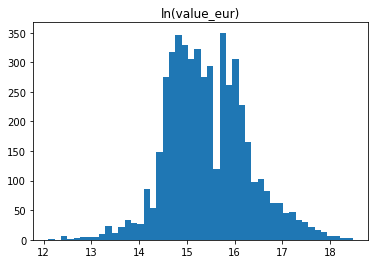

In [3]:
X = data[['age','height_cm','weight_kg','skill_dribbling','attacking_crossing','attacking_finishing','movement_acceleration','movement_sprint_speed','power_shot_power','mentality_aggression','defending_marking','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling','overall','potential']]
y = data['value_eur']
ylog = np.log(y)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(ylog, bins='auto')
plt.title("ln(value_eur)")
plt.show()

X_train, X_test, ylog_train, ylog_test, y_train, y_test = train_test_split(X, ylog, y, test_size=0.25, random_state=4)

# Training the Model

In [4]:
gbm_default = GradientBoostingRegressor()
gbm_default.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Defining a Score Function

In [5]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data_list = payload
    data_array = np.asarray(data_list)
    try:
        prediction = model.predict(data_array)
    except:
        prediction = model.predict(data_array.reshape(1, -1))
    return prediction.tolist()


# Testing Score Function

In [6]:
# to verify if score func works

import requests
req = requests.Request()
req.json = {"payload":X_test}

'''
Reference Sample Payload 

req.json = {"payload": [ 25, 185,  88,  78,  65,  81,  77,  75,  81,  63,  37,  26,   9,
        10,  79,  82]}
        
'''
score(gbm_default, req)

[7371874.661681472,
 4738569.183719679,
 21420646.72421206,
 18565368.234815322,
 2521068.456590734,
 4927893.68611642,
 17717792.6409526,
 536649.2767679248,
 5379405.813943993,
 2782661.685757643,
 3109098.804303743,
 3854078.9689723514,
 4098721.556383509,
 7769807.652539342,
 4692304.372048858,
 16930281.548238754,
 3473019.661723149,
 6661265.394274319,
 3016063.3275525435,
 10421430.298660977,
 1978920.712208258,
 2802425.7801835793,
 905938.3801071717,
 7703026.2316381205,
 4737163.454637377,
 9200545.134584036,
 40671774.99537544,
 11732600.005104974,
 11769365.628129426,
 127060.88757149503,
 5192798.597258351,
 3933793.1665185406,
 2461772.7940336037,
 17703016.395034224,
 5660456.160853369,
 2502423.5050830934,
 6259869.183645457,
 8698457.579092506,
 1833849.8102294598,
 4711891.257815066,
 2820859.974634944,
 2385315.894151529,
 1986428.0458969292,
 7220836.170301252,
 2028027.9431738034,
 1953495.1905439,
 3606521.780742981,
 2197176.33408137,
 6941085.884180223,
 5604811

# Calculating Y_true and Y_pred

In [7]:
Y_true = y_test

Y_pred = gbm_default.predict(X_test)
features = list(X_train)

# Registering the Model

In [8]:
register_model(
    gbm_default,
    score,
    "fifa_model",
    "fifa_regression",
    MLModelFlavours.sklearn,
    init_script="mkdir abc \\n cd abc \\n touch abc.txt",
    input_type="json",
    explain_ai=True,
    x_train=X_train, 
    y_train=y_train, 
    y_true=Y_true,
    y_pred=Y_pred,
    feature_names=features,
    feature_ids=features,
    target_names=["Value"],
    model_type="regression"
)

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


2021-11-24 12:47:42,317 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:42,321 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[25/25] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:47:44,726 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:44,730 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[22/22] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:47:46,805 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:46,809 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[22/22] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:47:48,727 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:48,732 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[27/27] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:47:51,273 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:51,278 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[29/29] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:47:53,632 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:53,637 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:47:56,447 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:56,453 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:47:59,056 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:47:59,061 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:48:01,607 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:01,612 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[27/27] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:48:04,314 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:04,319 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[29/29] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:48:07,048 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:07,053 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[29/29] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:48:09,645 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:09,650 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[28/28] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:48:12,370 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:12,375 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[13/13] grid cells ████████████████████ Time elapsed: 0 seconds

2021-11-24 12:48:14,127 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:14,133 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[13/13] grid cells ████████████████████ Time elapsed: 0 seconds

2021-11-24 12:48:15,906 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:15,911 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[24/24] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:48:18,211 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-11-24 12:48:18,216 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[26/26] grid cells ████████████████████ Time elapsed: 1 seconds

2021-11-24 12:48:20,115 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2021-11-24 12:48:20,121 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[16/16] features ████████████████████ Time elapsed: 3 seconds

2021-11-24 12:48:24,531 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2021-11-24 12:48:24,571 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used MAE
2021-11-24 12:48:24,573 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 516013.7860831824
2021-11-24 12:48:24,740 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed []
2021-11-24 12:48:24,743 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (3750,)
2021-11-24 12:48:24,745 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 516013.786; oracle score 324673.818
